<a href="https://colab.research.google.com/github/tadeo-vargas/Actividades/blob/main/AF6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelos de Aprendizaje Supervisado, árbol de decisión

*   Miguel Angel Quiñones Rosales 2173921
*   Tadeo Isaí Sebastián Vargas 2063804
*   Rubén Alfredo Cepeda Villegas 2049124
*   Elemento de lista
*   Elemento de lista
*   Elemento de lista

In [ ]:
# Celda 1 - Cargar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Opcional: para mostrar gráficos inline (Colab lo hace por defecto)
%matplotlib inline


In [ ]:
# Celda 2 - Cargar datos
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Shape X:", X.shape)
print("Clases y (conteo):\n", y.value_counts())
print("Mapping etiquetas:", {i: name for i, name in enumerate(data.target_names)})
# Muestra las primeras filas (opcional)
X.head()


Shape X: (569, 30)
Clases y (conteo):
 target
1    357
0    212
Name: count, dtype: int64
Mapping etiquetas: {0: np.str_('malignant'), 1: np.str_('benign')}


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Celda 3 - Train / Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (455, 30)
Test shape: (114, 30)


In [ ]:
# Celda 4 - Entrenar Decision Tree (configuración básica)
clf = DecisionTreeClassifier(random_state=42)  # puedes probar criterion='entropy' o limitar max_depth
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)


Accuracy (prueba): 0.9123

Classification report:

              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

Confusion matrix:
 [[39  3]
 [ 7 65]]


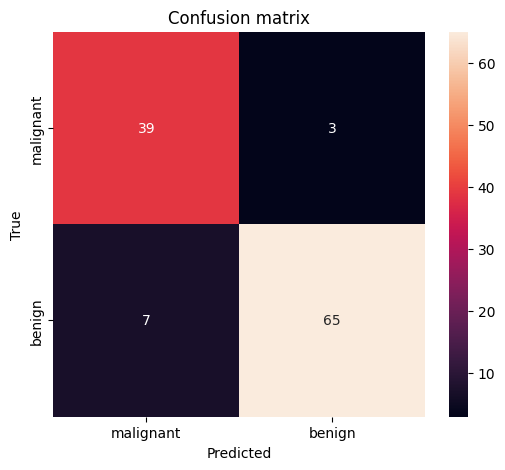

In [ ]:
# Celda 5 - Métricas y reporte
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (prueba): {acc:.4f}\n")

print("Classification report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Heatmap (visual)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()


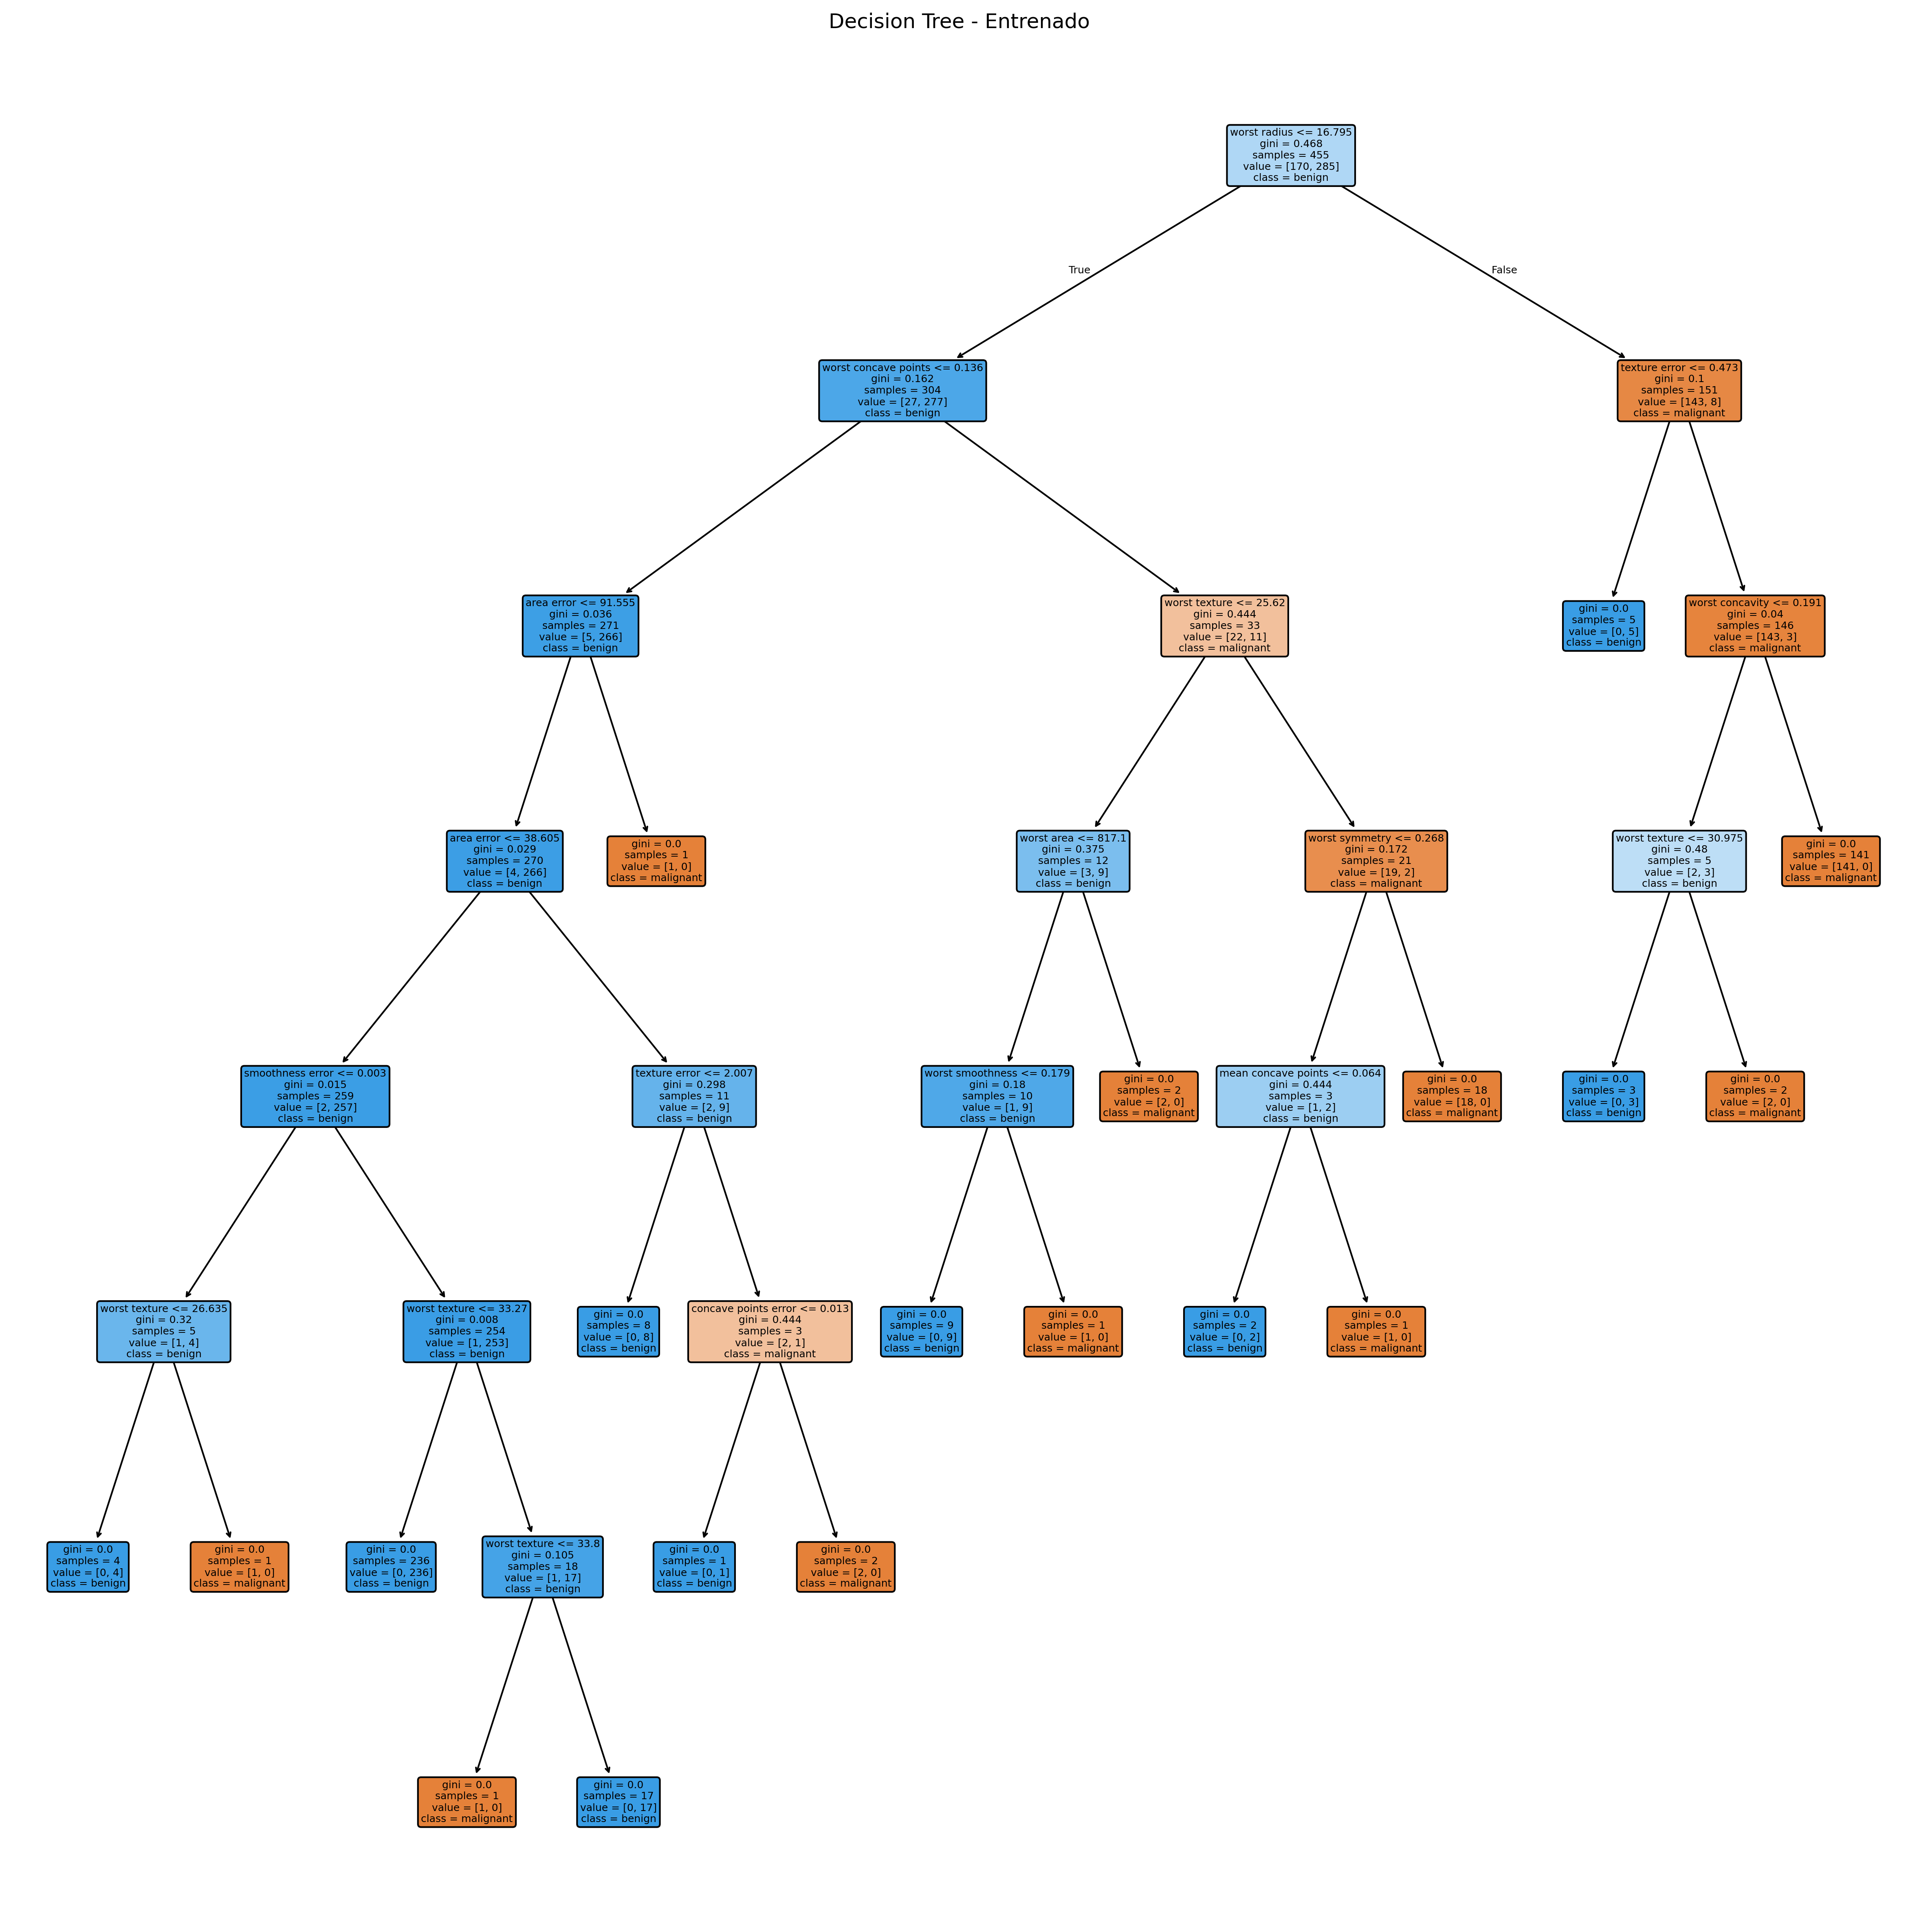

<Figure size 640x480 with 0 Axes>

In [ ]:
# Celda 6 - Visualizar árbol con alta resolución (DPI = 300)
plt.figure(figsize=(20, 20), dpi=300)
plot_tree(clf,
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True,
          rounded=True,
          fontsize=6)   # ajusta tamaño de fuente si es necesario
plt.title("Decision Tree - Entrenado")
plt.show()

# Guardar imagen (opcional)
plt.savefig('decision_tree_highres.png', dpi=300, bbox_inches='tight')


In [ ]:
# Celda 7 - Feature importances
feat_imp = pd.Series(clf.feature_importances_, index=data.feature_names)
feat_imp = feat_imp.sort_values(ascending=False)
print("Top 10 características por importancia:\n", feat_imp.head(10))


Top 10 características por importancia:
 worst radius            0.697811
worst concave points    0.116083
worst texture           0.058881
texture error           0.052661
worst concavity         0.016325
worst area              0.012678
area error              0.012085
worst symmetry          0.010733
worst smoothness        0.008452
concave points error    0.006261
dtype: float64


In [ ]:
# Celda 8 - GridSearch para evitar overfitting y mejorar generalización
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

best_clf = grid.best_estimator_
y_pred_best = best_clf.predict(X_test)
print("Accuracy (mejor modelo) en test:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=data.target_names))


Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV score: 0.9384615384615385
Accuracy (mejor modelo) en test: 0.9210526315789473
              precision    recall  f1-score   support

   malignant       0.87      0.93      0.90        42
      benign       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

